In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
province = pd.read_csv('covid19_italy_province.csv')

In [3]:
province.head()

,SNo,Date,Country,RegionCode,RegionName,ProvinceCode,ProvinceName,ProvinceAbbreviation,Latitude,Longitude,TotalPositiveCases
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
1,1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
2,2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
4,4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0


In [4]:
province.shape

(40201, 11)

In [5]:
province.isna().sum()

SNo                        0
Date                       0
Country                    0
RegionCode                 0
RegionName                 0
ProvinceCode               0
ProvinceName               0
ProvinceAbbreviation    9779
Latitude                9492
Longitude               9492
TotalPositiveCases         0
dtype: int64

In [9]:
province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40201 entries, 0 to 40200
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SNo                 40201 non-null  int64         
 1   Date                40201 non-null  datetime64[ns]
 2   Country             40201 non-null  object        
 3   RegionCode          40201 non-null  int64         
 4   RegionName          40201 non-null  object        
 5   ProvinceCode        40201 non-null  int64         
 6   ProvinceName        40201 non-null  object        
 7   TotalPositiveCases  40201 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.5+ MB


In [7]:
# Changing dtype
province['Date'] = pd.to_datetime(province['Date'])

# Replacing ITA with Italy
province['Country'] = province['Country'].str.replace('ITA', 'Italy')

In [8]:
# Dropping cols
province = province.drop(columns=['ProvinceAbbreviation','Latitude','Longitude'], axis=1)

In [10]:
province.shape

(40201, 8)

In [11]:
province.isna().sum()

SNo                   0
Date                  0
Country               0
RegionCode            0
RegionName            0
ProvinceCode          0
ProvinceName          0
TotalPositiveCases    0
dtype: int64

In [15]:
province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40201 entries, 0 to 40200
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SNo                 40201 non-null  int64         
 1   Date                40201 non-null  datetime64[ns]
 2   Country             40201 non-null  category      
 3   RegionCode          40201 non-null  int64         
 4   RegionName          40201 non-null  category      
 5   ProvinceCode        40201 non-null  int64         
 6   ProvinceName        40201 non-null  category      
 7   TotalPositiveCases  40201 non-null  int64         
dtypes: category(3), datetime64[ns](1), int64(4)
memory usage: 1.7 MB


In [13]:
# Changing dtype from object to category
province['Country'] = province['Country'].astype('category')
province['RegionName'] = province['RegionName'].astype('category')
province['ProvinceName'] = province['ProvinceName'].astype('category')

In [14]:
province.head()

,SNo,Date,Country,RegionCode,RegionName,ProvinceCode,ProvinceName,TotalPositiveCases
0,0,2020-02-24 18:00:00,Italy,13,Abruzzo,66,L'Aquila,0
1,1,2020-02-24 18:00:00,Italy,13,Abruzzo,67,Teramo,0
2,2,2020-02-24 18:00:00,Italy,13,Abruzzo,68,Pescara,0
3,3,2020-02-24 18:00:00,Italy,13,Abruzzo,69,Chieti,0
4,4,2020-02-24 18:00:00,Italy,13,Abruzzo,979,In fase di definizione/aggiornamento,0


In [16]:
province['ProvinceName'].value_counts()

ProvinceName
In fase di definizione/aggiornamento    6027
Fuori Regione / Provincia Autonoma      3465
Pesaro e Urbino                          287
Reggio di Calabria                       287
Ravenna                                  287
                                        ... 
Ferrara                                  287
Fermo                                    287
Enna                                     287
Cuneo                                    287
Viterbo                                  287
Name: count, Length: 109, dtype: int64

In [17]:
# Dropping this value In fase di definizione/aggiornamento
province = province[~(province['ProvinceName'].eq('In fase di definizione/aggiornamento'))]
province = province[~(province['ProvinceName'].eq('Fuori Regione / Provincia Autonoma'))]

In [18]:
province.head()

,SNo,Date,Country,RegionCode,RegionName,ProvinceCode,ProvinceName,TotalPositiveCases
0,0,2020-02-24 18:00:00,Italy,13,Abruzzo,66,L'Aquila,0
1,1,2020-02-24 18:00:00,Italy,13,Abruzzo,67,Teramo,0
2,2,2020-02-24 18:00:00,Italy,13,Abruzzo,68,Pescara,0
3,3,2020-02-24 18:00:00,Italy,13,Abruzzo,69,Chieti,0
5,5,2020-02-24 18:00:00,Italy,17,Basilicata,76,Potenza,0


In [29]:
# Renaming ProvinceName col 

In [26]:
province.loc[:,'ProvinceName'] = province['ProvinceName'].str.\
replace('Fuori Regione / Provincia Autonoma','Provincia Autonoma')

In [19]:
province['ProvinceName'].value_counts()

ProvinceName
Agrigento                               287
Pesaro e Urbino                         287
Reggio nell'Emilia                      287
Reggio di Calabria                      287
Ravenna                                 287
                                       ... 
Fermo                                   287
Enna                                    287
Viterbo                                 287
In fase di definizione/aggiornamento      0
Fuori Regione / Provincia Autonoma        0
Name: count, Length: 109, dtype: int64

In [20]:
#province.loc[:,'Date'] = pd.to_datetime(province['Date']).dt.date

In [21]:
province.head()

,SNo,Date,Country,RegionCode,RegionName,ProvinceCode,ProvinceName,TotalPositiveCases
0,0,2020-02-24 18:00:00,Italy,13,Abruzzo,66,L'Aquila,0
1,1,2020-02-24 18:00:00,Italy,13,Abruzzo,67,Teramo,0
2,2,2020-02-24 18:00:00,Italy,13,Abruzzo,68,Pescara,0
3,3,2020-02-24 18:00:00,Italy,13,Abruzzo,69,Chieti,0
5,5,2020-02-24 18:00:00,Italy,17,Basilicata,76,Potenza,0


In [44]:
# TotalPositiveCases by RegionName
province.groupby('ProvinceName')['TotalPositiveCases'].count().sort_values(ascending=False)

ProvinceName
Agrigento                               287
Pesaro e Urbino                         287
Reggio nell'Emilia                      287
Reggio di Calabria                      287
Ravenna                                 287
                                       ... 
Fermo                                   287
Enna                                    287
Viterbo                                 287
In fase di definizione/aggiornamento      0
Fuori Regione / Provincia Autonoma        0
Name: TotalPositiveCases, Length: 109, dtype: int64

In [23]:
# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

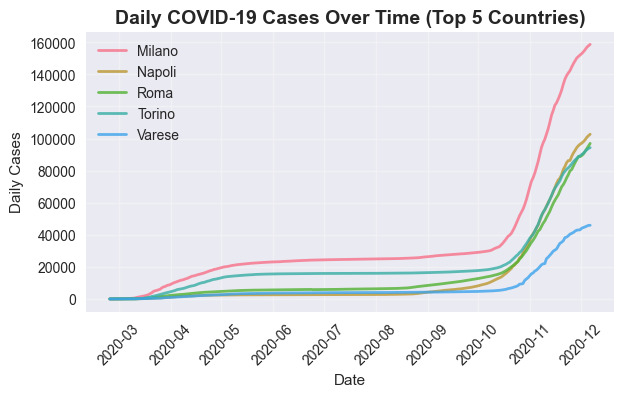

In [24]:
# 1. Time Series Plot - Daily Cases Over Time
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)

# Plot for top 5 countries by total cases
top_countries = province.groupby('ProvinceName')['TotalPositiveCases'].max().nlargest(5).index
for prov_name in top_countries:
    country_data = province[province['ProvinceName'] == prov_name]
    plt.plot(country_data['Date'], country_data['TotalPositiveCases'], 
             label=prov_name, linewidth=2, alpha=0.8)

plt.title('Daily COVID-19 Cases Over Time (Top 5 Countries)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

Text(792.3131313131312, 0.5, 'ProvinceName')

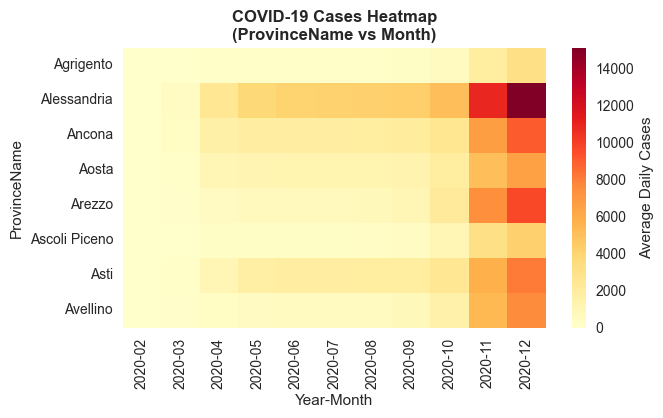

In [45]:
# 2. Heatmap - Cases by Country and Month
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 2)
province['Year_month'] = province['Date'].dt.to_period('M')
heatmap_data = province.groupby(['ProvinceName', 'Year_month'])['TotalPositiveCases'].mean().unstack(fill_value=0)

# Select subset for better visualization
heatmap_subset = heatmap_data.iloc[:8, -12:]  # Last 12 months, top 8 countries
sns.heatmap(heatmap_subset, annot=False, cmap='YlOrRd', cbar_kws={'label': 'Average Daily Cases'})
plt.title('COVID-19 Cases Heatmap\n(ProvinceName vs Month)', fontsize=12, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('ProvinceName')

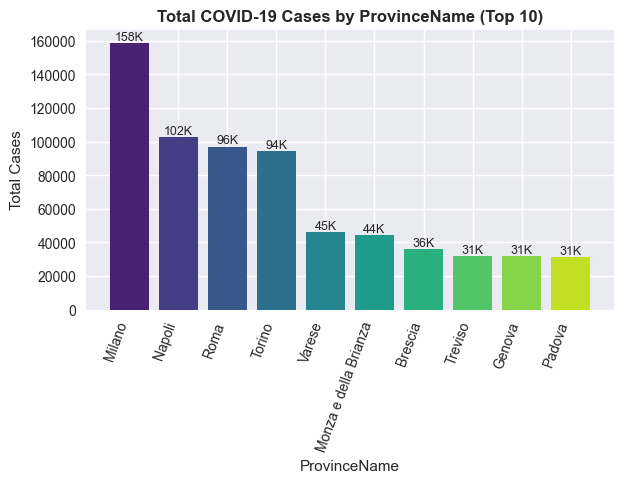

In [46]:
# 3. Bar Plot - Total Cases by Country
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 3)
total_cases = province.groupby('ProvinceName')['TotalPositiveCases'].max().sort_values(ascending=False)
top_10_cases = total_cases.head(10)

bars = plt.bar(range(len(top_10_cases)), top_10_cases.values, 
               color=sns.color_palette("viridis", len(top_10_cases)))
plt.title('Total COVID-19 Cases by ProvinceName (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('ProvinceName')
plt.ylabel('Total Cases')
plt.xticks(range(len(top_10_cases)), top_10_cases.index, rotation=70, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height/1000)}K', ha='center', va='bottom', fontsize=9)

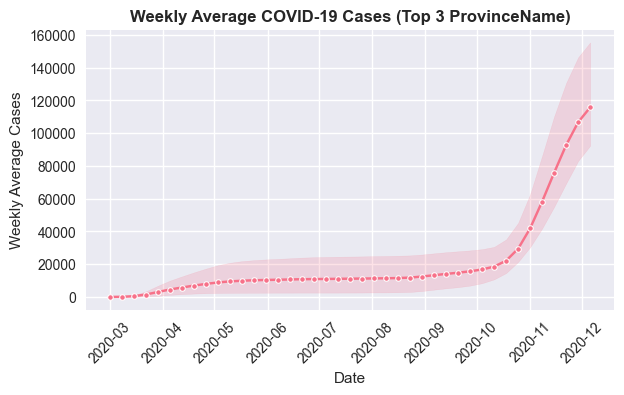

In [47]:
# 7. Line Plot with Confidence Intervals
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 3)
# Resample data to weekly averages for smoother visualization
weekly_data = province.set_index('Date').groupby('ProvinceName').resample('W')['TotalPositiveCases'].mean().reset_index()
weekly_data = weekly_data[weekly_data['ProvinceName'].isin(top_countries[:3])]

sns.lineplot(data=weekly_data, x='Date', y='TotalPositiveCases', #hue='ProvinceName', 
             marker='o', markersize=4, ax=plt.gca())
plt.title('Weekly Average COVID-19 Cases (Top 3 ProvinceName)', fontsize=12, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Weekly Average Cases')
plt.xticks(rotation=45)
plt.show()